<a href="https://colab.research.google.com/github/RohanOpenSource/ml-notebooks/blob/main/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
housing_data = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


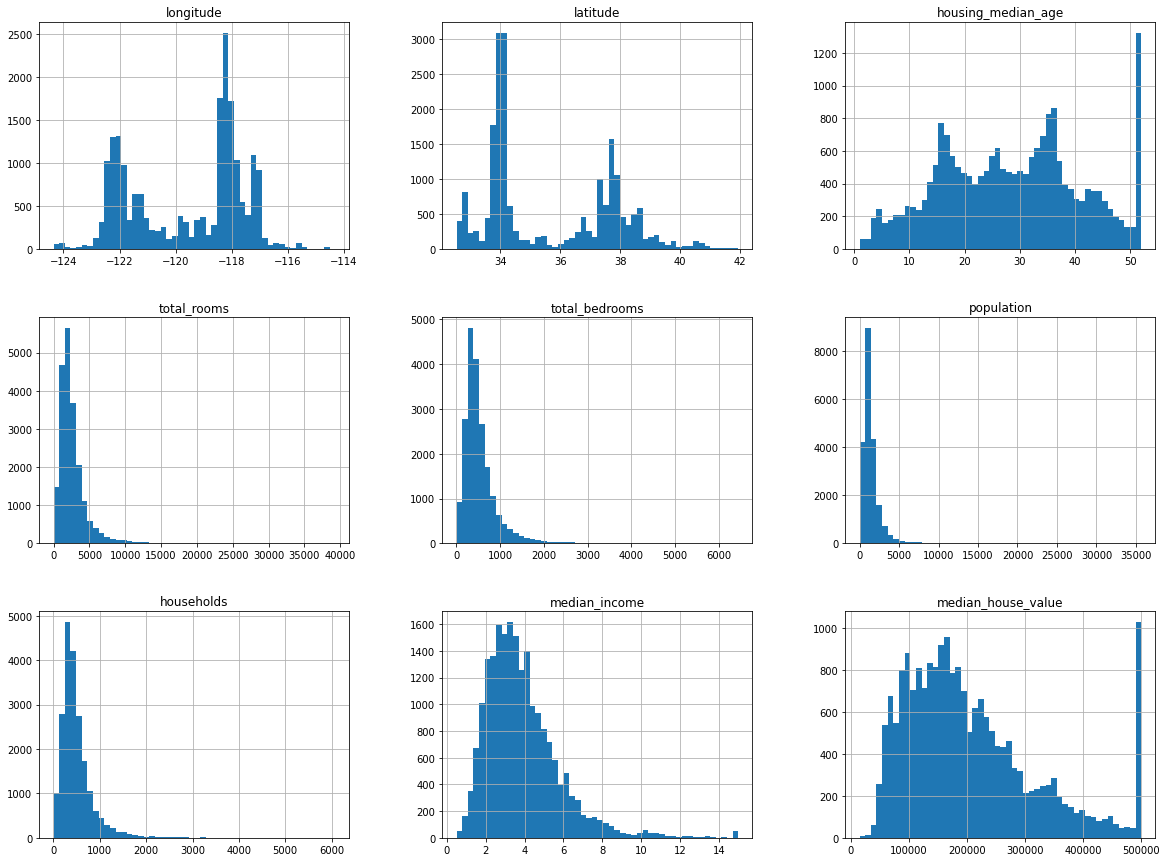

(None, <matplotlib.axes._subplots.AxesSubplot at 0x7fdf7fe4ed10>)

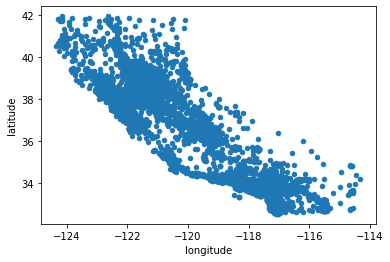

In [5]:
housing_data.hist(bins=50, figsize=(20,15)) #Create a histogram of the data
plt.show(), housing_data.plot(kind="scatter", x="longitude", y="latitude")

In [6]:
housing_data = housing_data.dropna(subset=["total_bedrooms"]) #remove nan values
housing_onehot = pd.get_dummies(housing_data)
train_set, test_set = train_test_split(housing_onehot, test_size=0.2, random_state=42)
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,227600.0,1,0,0,0,0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,110400.0,0,1,0,0,0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,248100.0,0,1,0,0,0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,305600.0,1,0,0,0,0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,214600.0,0,0,0,0,1


In [7]:
X = train_set.drop("median_house_value", axis=1)
y = train_set["median_house_value"]
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"]
y_test

14416    245800.0
16383    137900.0
7731     218200.0
1410     220800.0
1335     170500.0
           ...   
8291     500001.0
6274     157900.0
2997     100200.0
13440    127700.0
14797    133700.0
Name: median_house_value, Length: 4087, dtype: float64

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
from sklearn.metrics import mean_squared_error
pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
rmse

69297.71669113012

This loss seems good for California house prices, however this data is from the 90s meaning that house prices in California were still fairly reasonable. The loss is so high because the graph of the data isn't exactly a staright line. Linear regression is not good for this dataset

In [10]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [11]:
pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
rmse

67103.44620421347

Better, but not great either. Let's try something else

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear"),
])
model.compile(loss=tf.keras.losses.mean_absolute_error, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])
model.fit(X, y, epochs=500)

Epoch 1/500
511/511 [==============================] - 4s 2ms/step - loss: 102336.0391 - mae: 102336.0391
Epoch 2/500
511/511 [==============================] - 1s 2ms/step - loss: 76587.3750 - mae: 76587.3750
Epoch 3/500
511/511 [==============================] - 1s 2ms/step - loss: 69501.2266 - mae: 69501.2266
Epoch 4/500
511/511 [==============================] - 1s 2ms/step - loss: 61234.0742 - mae: 61234.0742
Epoch 5/500
511/511 [==============================] - 1s 2ms/step - loss: 56071.3164 - mae: 56071.3164
Epoch 6/500
511/511 [==============================] - 1s 2ms/step - loss: 53920.4805 - mae: 53920.4805
Epoch 7/500
511/511 [==============================] - 1s 2ms/step - loss: 51032.0195 - mae: 51032.0195
Epoch 8/500
511/511 [==============================] - 1s 2ms/step - loss: 50686.2812 - mae: 50686.2812
Epoch 9/500
511/511 [==============================] - 1s 2ms/step - loss: 50352.9492 - mae: 50352.9492
Epoch 10/500
511/511 [==============================] - 1s 2ms

Pretty Good!

In [22]:
model.save("assets/model.h5", save_format='h5') #would hate to forget to save the model